<a href="https://colab.research.google.com/github/khanhduy0703/desktop-tutorial/blob/main/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
temperature = ctrl.Antecedent(np.arange(10, 30.1, 0.1), 'temperature')
humidity = ctrl.Antecedent(np.arange(10, 100.1, 0.1), 'humidity ')
fan_speed = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'fan_speed')
cooling_power = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'cooling_power')

In [ ]:
temperature['cold'] = fuzz.trimf(temperature.universe, [9, 12, 15])
temperature['cool'] = fuzz.trimf(temperature.universe, [12, 15, 18])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 18, 25])
temperature['hot'] = fuzz.trimf(temperature.universe, [22, 26, 30])

humidity['dry'] = fuzz.trimf(humidity.universe, [20, 30, 40])
humidity['comfortable'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['humid'] = fuzz.trimf(humidity.universe, [50, 60, 80])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 2, 5])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [2, 5, 8])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [5, 8, 10])

cooling_power['low'] = fuzz.trimf(cooling_power.universe, [0, 2, 5])
cooling_power['medium'] = fuzz.trimf(cooling_power.universe, [2, 5, 8])
cooling_power['high'] = fuzz.trimf(cooling_power.universe, [5, 8, 10])

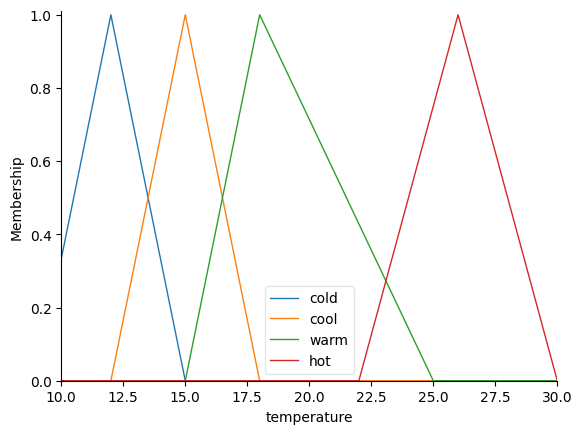

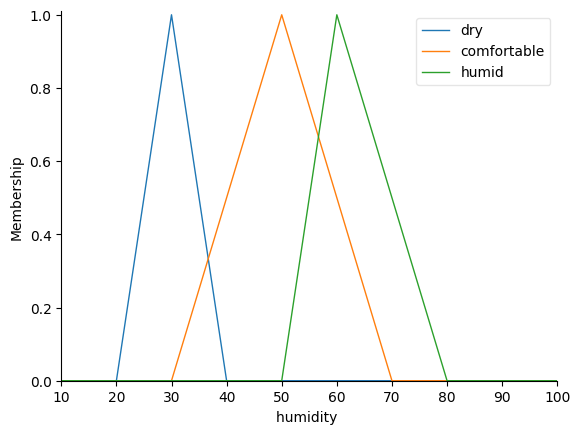

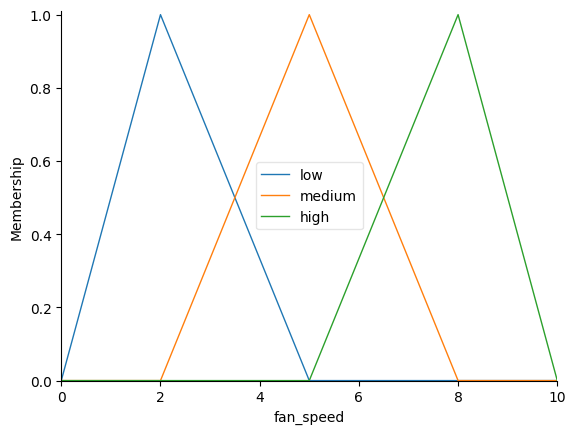

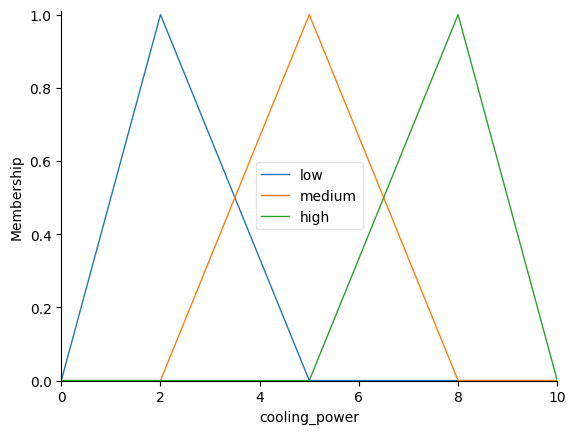

In [ ]:
temperature.view()
humidity.view()
fan_speed.view()
cooling_power.view()

In [ ]:
rule1 = ctrl.Rule(temperature['hot'] & humidity['dry'], fan_speed['high'])
rule2 = ctrl.Rule(temperature['hot'] & humidity['comfortable'], fan_speed['high'])
rule3 = ctrl.Rule(temperature['hot'] & humidity['humid'], fan_speed['medium'])

rule4 = ctrl.Rule(temperature['warm'] & humidity['dry'],fan_speed['medium'])
rule5 = ctrl.Rule(temperature['warm'] & humidity['comfortable'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['warm'] & humidity['humid'], fan_speed['medium'])

rule7 = ctrl.Rule(temperature['cool'] & humidity['dry'], fan_speed['low'])
rule8 = ctrl.Rule(temperature['cool'] & humidity['comfortable'],fan_speed['medium'])
rule9 = ctrl.Rule(temperature['cool'] & humidity['humid'], fan_speed['medium'])

rule10 = ctrl.Rule(temperature['cold'] & humidity['dry'],fan_speed['low'])
rule11 = ctrl.Rule(temperature['cold'] & humidity['comfortable'],fan_speed['low'])
rule12 = ctrl.Rule(temperature['cold'] & humidity['humid'], fan_speed['medium'])

In [ ]:
rule13 = ctrl.Rule(temperature['hot'] & humidity['dry'], cooling_power['high'])
rule14 = ctrl.Rule(temperature['hot'] & humidity['comfortable'], cooling_power['high'])
rule15 = ctrl.Rule(temperature['hot'] & humidity['humid'], cooling_power['high'])

rule16 = ctrl.Rule(temperature['warm'] & humidity['dry'], cooling_power['medium'])
rule17 = ctrl.Rule(temperature['warm'] & humidity['comfortable'], cooling_power['high'])
rule18 = ctrl.Rule(temperature['warm'] & humidity['humid'], cooling_power['high'])

rule19 = ctrl.Rule(temperature['cool'] & humidity['dry'], cooling_power['medium'])
rule20 = ctrl.Rule(temperature['cool'] & humidity['comfortable'], cooling_power['medium'])
rule21 = ctrl.Rule(temperature['cool'] & humidity['humid'], cooling_power['high'])

rule22 = ctrl.Rule(temperature['cold'] & humidity['dry'], cooling_power['low'])
rule23 = ctrl.Rule(temperature['cold'] & humidity['comfortable'],cooling_power['low'])
rule24 = ctrl.Rule(temperature['cold'] & humidity['humid'], cooling_power['low'])

4.018927444794953
6.115814151747658


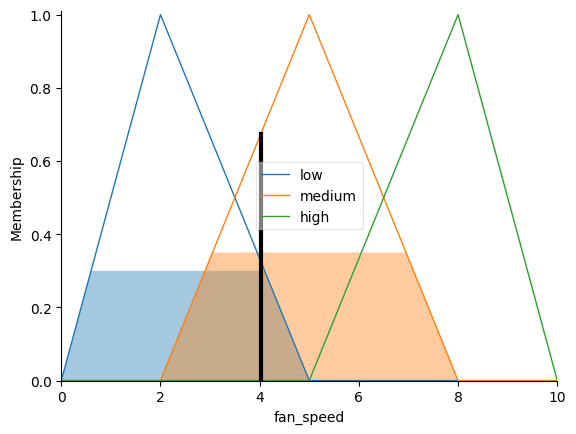

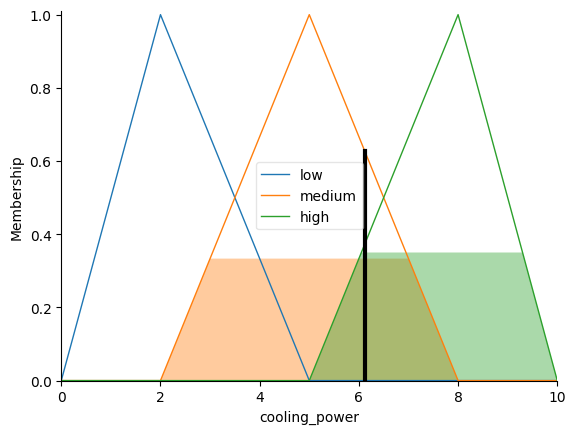

In [84]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['temperature'] = 17
tipping.input['humidity '] = 37
tipping.compute()
print(tipping.output['fan_speed'])
print(tipping.output['cooling_power'])
fan_speed.view(sim=tipping)
cooling_power.view(sim=tipping)